In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (200, 200)
#plt.style.use('ggplot')


In [ ]:
pd.options.display.max_columns = 200
#pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 200

In [3]:
dataframe = pd.read_csv('Datos_Mamografias.csv',sep=',')
dataframe.head(10)

,Imagen,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_15,Dcm_16,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
0,Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5000,700.0,621.0,1.073,-8.4,AUTOMATIC,AutoFilter,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.952690,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
1,Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0000,700.0,628.0,1.073,-44.9,AUTOMATIC,AutoFilter,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.000003,40089.941086,0.947479,381659.322432,0.008924,2191.233824,1.486547e+06,12.113787,18.843584,7.420714e-07,8.663215,-0.180066,0.987916,0.000003,48232.540197,0.936822,381719.250143,0.00815

In [4]:
dataframe.describe()#datos estadísticos

,Age,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_6,Dcm_7,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_20,Dcm_21,Dcm_22,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48
count,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6592.000000,6591.000000,6548.000000,6592.000000,6591.000000,6548.000000,6605.000000,6605.000000,6592.000000,6592.000000,6591.000000,6548.000000,6468.000000,6468.000000,6468.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6.605000e+03,6605.000000,6605.000000,6605.000000,6588.000000,6605.000000,6591.000000,6591.000000,6591.000000,6591.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6602.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6588.000000,6605.000000,6591.000000,6591.000000,6591.000000,6591.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6602.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000
mean,54.553974,29.686298,116.203179,126.815443,1009.372748,0.046478,3.000000e-01,58.985617,80.191051,690.201363,621.394852,1.054963,-0.042286,389.701136,0.503325,2043.805753,4088.547464,2.698793e+06,1163.565008,1030.416730,590.882462,1.042328,1.260760,745.178955,516.484911,554.709885,

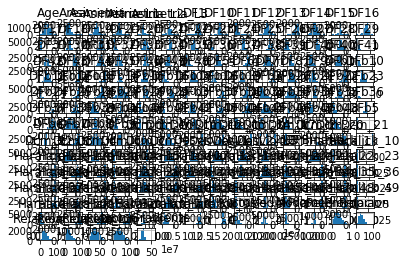

In [5]:
dataframe.hist()
plt.show()

In [6]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6613 entries, 0 to 6612
Columns: 198 entries, Imagen to ACR
dtypes: float64(187), object(11)
memory usage: 10.0+ MB
None


In [7]:
#nombre de las variables/features/características
dataframe.columns.values

array(['Imagen', 'Age', 'View', 'Laterality', 'Dcm_1', 'Dcm_2', 'Dcm_3',
       'Dcm_4', 'Dcm_5', 'Dcm_6', 'Dcm_7', 'Dcm_8', 'Dcm_9', 'Dcm_10',
       'Dcm_11', 'Dcm_12', 'Dcm_13', 'Dcm_14', 'Dcm_15', 'Dcm_16',
       'Dcm_17', 'Dcm_18', 'Dcm_19', 'Dcm_20', 'Dcm_21', 'Dcm_22',
       'Dcm_23', 'Area', 'Promedio', 'Media', 'Desvio', 'Asimetria',
       'Kurtosis', 'Moda', 'Desvio_L1', 'Desvio_L2', 'Desvio_L3',
       'Asimetria_L1', 'Asimetria_L2', 'Asimetria_L3', 'promGradiente',
       'Relacion', 'Relacion_L1', 'Relacion_L2', 'Relacion_L3',
       'Relacion_L4', 'EP', 'EPBinaria', 'RelEntropia', 'Haralick_1',
       'Haralick_2', 'Haralick_3', 'Haralick_4', 'Haralick_5',
       'Haralick_6', 'Haralick_7', 'Haralick_8', 'Haralick_9',
       'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13',
       'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17',
       'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21',
       'Haralick_22', 'Haralick_23', 'Haralick_24', 'H

In [8]:
dataframe.dtypes

Imagen            object
Age              float64
View              object
Laterality        object
Dcm_1            float64
Dcm_2            float64
Dcm_3            float64
Dcm_4            float64
Dcm_5             object
Dcm_6            float64
Dcm_7            float64
Dcm_8             object
Dcm_9            float64
Dcm_10           float64
Dcm_11           float64
Dcm_12           float64
Dcm_13           float64
Dcm_14           float64
Dcm_15            object
Dcm_16            object
Dcm_17           float64
Dcm_18            object
Dcm_19            object
Dcm_20           float64
Dcm_21           float64
Dcm_22           float64
Dcm_23            object
Area             float64
Promedio         float64
Media            float64
Desvio           float64
Asimetria        float64
Kurtosis         float64
Moda             float64
Desvio_L1        float64
Desvio_L2        float64
Desvio_L3        float64
Asimetria_L1     float64
Asimetria_L2     float64
Asimetria_L3     float64


In [14]:
data = dataframe.dropna(axis=0)
x = data.drop("ACR",1)
y = data["ACR"]

In [15]:
All_features = [x for x in data.columns if data[x].dtypes == 'float64']
Dicom_features = [x for x in data.columns if ('Dcm_'in x and data[x].dtypes == 'float64')]
Haralick_features = [x for x in data.columns if ('Haralick_'in x and data[x].dtypes == 'float64')]
DF_features = [x for x in data.columns if ('DF'in x and data[x].dtypes == 'float64')]

In [16]:
print(All_features)

['Age', 'Dcm_1', 'Dcm_2', 'Dcm_3', 'Dcm_4', 'Dcm_6', 'Dcm_7', 'Dcm_9', 'Dcm_10', 'Dcm_11', 'Dcm_12', 'Dcm_13', 'Dcm_14', 'Dcm_17', 'Dcm_20', 'Dcm_21', 'Dcm_22', 'Area', 'Promedio', 'Media', 'Desvio', 'Asimetria', 'Kurtosis', 'Moda', 'Desvio_L1', 'Desvio_L2', 'Desvio_L3', 'Asimetria_L1', 'Asimetria_L2', 'Asimetria_L3', 'promGradiente', 'Relacion', 'Relacion_L1', 'Relacion_L2', 'Relacion_L3', 'Relacion_L4', 'EP', 'EPBinaria', 'RelEntropia', 'Haralick_1', 'Haralick_2', 'Haralick_3', 'Haralick_4', 'Haralick_5', 'Haralick_6', 'Haralick_7', 'Haralick_8', 'Haralick_9', 'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13', 'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17', 'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21', 'Haralick_22', 'Haralick_23', 'Haralick_24', 'Haralick_25', 'Haralick_26', 'Haralick_27', 'Haralick_28', 'Haralick_29', 'Haralick_30', 'Haralick_31', 'Haralick_32', 'Haralick_33', 'Haralick_34', 'Haralick_35', 'Haralick_36', 'Haralick_37', 'Haralick_3

In [18]:
corr = data.corr()

In [19]:
#Correlation with output variable
cor_target = abs(cor["ACR"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

NameError: name 'cor' is not defined

In [ ]:
Dicom_features.remove('Dcm_6')
Dicom_features.remove('Dcm_7')
Dicom_features.remove('Dcm_11')
Dicom_features.remove('Dcm_13')
Dicom_features.remove('Dcm_14')
Dicom_features.remove('Dcm_21')
Dicom_features.remove('Dcm_22')

In [ ]:
sns.pairplot(data[Dicom_features])

In [ ]:
sns.pairplot(data[DF_features])

In [ ]:
from sklearn.preprocessing import StandardScaler
x = data.loc[:,Dicom_features].values

In [ ]:
print(x.min())
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])